In [22]:
import uproot
import pandas
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})

In [2]:
root_file_ggH = '/eos/user/t/tsculac/BigStuff/LegacyProduction_1/MuonWPOptimization/ggH125/ZZ4lAnalysis.root'
root_file_qqZZ = '/eos/user/t/tsculac/BigStuff/LegacyProduction_1/MuonWPOptimization/ZZTo4l/ZZ4lAnalysis.root'
# root_file_data = '/eos/user/m/mkovac/Data/Muons/DY_2017_8_6_2019/train.root'

tree_ggH = uproot.open(root_file_ggH)["ZZTree/candTree"]
tree_qqZZ = uproot.open(root_file_qqZZ)["ZZTree/candTree"]

In [3]:
df_ggH = tree_ggH.pandas.df(entrystop=None, flatten=False)

In [4]:
df_qqZZ = tree_qqZZ.pandas.df(entrystop=500, flatten=False)

In [25]:
hCounters = uproot.open(root_file_ggH)["ZZTree/Counters"]
# hCounters.show()

n_gen_events    = hCounters[1]
gen_sum_weights = hCounters[40]

print n_gen_events
print gen_sum_weights

743577.0
743847.75


In [29]:
df_ggH = df_ggH.query('ZZsel >= 90')
# print df_ggH['ZZsel']

num_of_leptons = df_ggH['LepEta'].apply(lambda x: len(x))
df_ggH['num_of_leptons'] = num_of_leptons

df_ggH = df_ggH.query('num_of_leptons == 4')
df_ggH = df_ggH.query('ZZMass >= 118 and ZZMass <= 130')

## 4mu only

In [18]:
df_ggH = df_ggH.query('Z1Flav == -169 and Z2Flav == -169')

# print df_ggH['LepPt']
# print df_ggH['LepBDT']

isBDT = []

for i in df_ggH.index:
    temp = (np.select(condlist=[df_ggH['LepPt'][i] <= 10, df_ggH['LepPt'][i] > 10], 
                      choicelist=[df_ggH['LepBDT'][i] > 2.108, df_ggH['LepBDT'][i] > 1.336]))
    isBDT_temp = temp.all()
    isBDT.append(isBDT_temp)

df_ggH['isBDT'] = isBDT

# is_BDT = df_ggH['LepBDT'].apply(lambda x: x > 2)

# for i in df_ggH.index:
#     print i
#     is_BDT[i] = is_BDT[i].all()

df_ggH = df_ggH.query('isBDT == True')

In [34]:
event_weight=(35.9*1000*df_ggH['xsec']*df_ggH['overallEventWeight'])/gen_sum_weights
# print event_weight
event_weight=event_weight*df_ggH['ggH_NNLOPS_weight']
# print event_weight

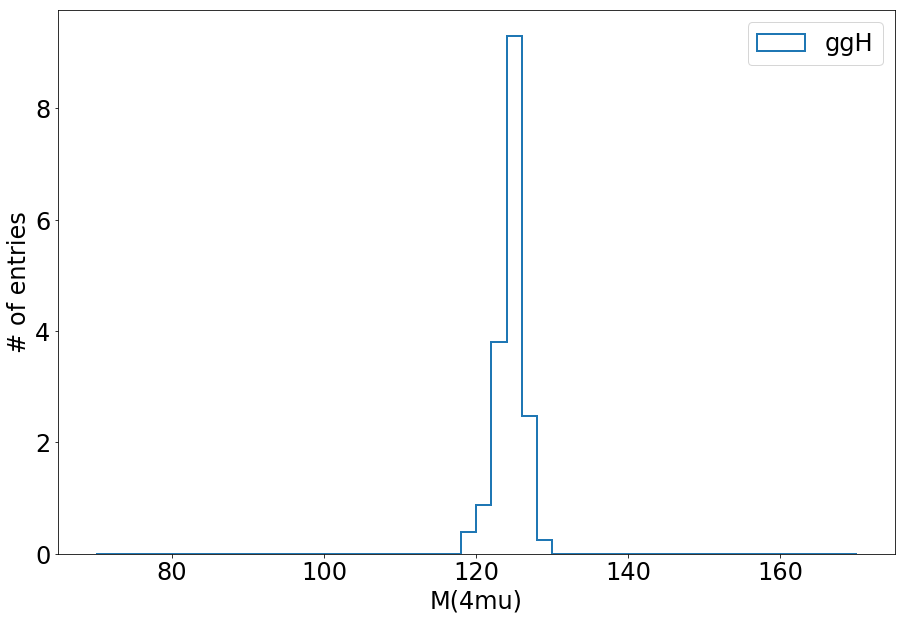

In [41]:
plt.figure(figsize = (15,10))
# plt.yscale('log')
values, bins, _ = plt.hist(df_ggH['ZZMass'], bins=50, histtype='step', linewidth=2, weights=event_weight, range=[70,170], label='ggH')
# _, bins, _ = plt.hist(df_ggH['ZZMass'], bins=200, histtype='step', linewidth=2, weights=event_weight, label='ggH')
# _ = plt.hist(df_qqZZ['ZZMass'], bins=bins, histtype='step', linewidth=2, density=1, label='qqZZ')
plt.title('')
plt.ylabel('# of entries')
plt.xlabel('M(4mu)')
plt.legend()
# values

In [36]:
area = sum(values)
print area

17.091046364363375
